In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.3 MB/s eta 0:00:00


In [ ]:
import mne
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
lines = np.loadtxt('/content/508w1.eea')

In [ ]:
import os
import numpy as np

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/F/norm'  # Specify the path to your folder containing .eea files

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.eea'):
        file_path = os.path.join(folder_path, file_name)
        data1 = np.loadtxt(file_path, dtype=str)
        eeg = [float(value) for value in data1]
        data = []
        num_samples = 7680
        num_channels = 16
        for i in range(num_channels):
          chnl = i*num_samples
          temp = []
          for j in range(num_samples):
            temp.append(eeg[j+chnl])
            data.append(temp)

        data = np.array(data)

        sfreq = 128
        ch_list = ["F7", "F3", "F4", "F8", "T3", "C3", "Cz", "C4", "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
        ch_type = "eeg"

        info = mne.create_info(ch_list, sfreq, ch_type)
        raw = mne.io.RawArray(data, info)
        raw.save('/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G', overwrite=True)
        # raw_data = mne.io.read_raw_fif('/content/508w1.fif')

        # eeg_data = raw_data.get_data(picks='eeg')
        # corr_matrix = np.corrcoef(eeg_data)
        # # Take the absolute values for positive correlations
        # corr_matrix = np.abs(corr_matrix)
        # threshold = 0.5
        # corr_matrix[corr_matrix < threshold] = 0
        # graph = nx.from_numpy_array(corr_matrix)

        # layout = nx.spring_layout(graph)
        # nx.draw_networkx_nodes(graph, layout)
        # nx.draw_networkx_edges(graph, layout)
        # labels = {node: node for node in graph.nodes}
        # nx.draw_networkx_labels(graph, layout, labels)
        # plt.axis("off")
        # plt.show()
        # Process the data for each file
        # ... (perform your desired operations on the `data` array)


In [ ]:
import os
import numpy as np
import mne

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/F/norm'  # Specify the path to your folder containing .eea files
output_folder = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G'  # Specify the path to the output folder

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.eea'):
        file_path = os.path.join(folder_path, file_name)
        data1 = np.loadtxt(file_path, dtype=str)
        eeg = [float(value) for value in data1]
        data = []
        num_samples = 7680
        num_channels = 16
        for i in range(num_channels):
            chnl = i * num_samples
            temp = []
            for j in range(num_samples):
                temp.append(eeg[j + chnl])
            data.append(temp)

        data = np.array(data)

        # sfreq = 128
        # ch_list = ["F7", "F3", "F4", "F8", "T3", "C3", "Cz", "C4", "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
        # ch_type = "eeg"

        info = mne.create_info(ch_list, sfreq, ch_type)
        raw = mne.io.RawArray(data, info)

        # Generate the output file path
        file_base = os.path.splitext(file_name)[0]
        output_file_path = os.path.join(output_folder, file_base + '.fif')

        # Save the raw object as a .fif file
        raw.save(output_file_path, overwrite=True)


In [ ]:
import os
import numpy as np
import mne

input_folder = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/F/norm'  # Specify the path to your folder containing .eea files
output_folder = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G'  # Specify the path to the output folder

# Iterate over the files in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith('.eea'):
        input_file_path = os.path.join(input_folder, file_name)
        output_file_path = os.path.join(output_folder, file_name[:-4] + '.fif')

        # Load the data from the .eea file
        data = np.loadtxt(input_file_path, dtype=str)

        # Perform any necessary processing on the data
        # ...

        # Create MNE objects and save as .fif file
        info = mne.create_info(ch_names=['Channel1', 'Channel2'], sfreq=1000, ch_types='eeg')  # Customize as per your channel information
        raw = mne.io.RawArray(data.T, info)
        raw.save(output_file_path, overwrite=True)


In [ ]:
import os
import numpy as np
import mne
import shutil

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/F/norm'  # Specify the path to your folder containing .eea files
output_folder = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G'  # Specify the path to the output folder

# Iterate over the files in the folder
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith('.eea'):
            file_path = os.path.join(root, file_name)
            relative_path = os.path.relpath(file_path, folder_path)
            output_subfolder = os.path.join(output_folder, os.path.dirname(relative_path))
            os.makedirs(output_subfolder, exist_ok=True)

            data1 = np.loadtxt(file_path, dtype=str)
            eeg = [float(value) for value in data1]
            data = []
            num_samples = 7680
            num_channels = 16
            for i in range(num_channels):
                chnl = i * num_samples
                temp = []
                for j in range(num_samples):
                    temp.append(eeg[j + chnl])
                data.append(temp)

            data = np.array(data)

            # sfreq = 128
            # ch_list = ["F7", "F3", "F4", "F8", "T3", "C3", "Cz", "C4", "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
            # ch_type = "eeg"

            info = mne.create_info(ch_list, sfreq, ch_type)
            raw = mne.io.RawArray(data, info)

            # Generate the output file path
            output_file_dir = os.path.join(output_folder, os.path.dirname(relative_path))
            os.makedirs(output_file_dir, exist_ok=True)
            output_file_path = os.path.join(output_file_dir, file_name[:-4] + '.fif')

            # Save the raw object as a .fif file
            raw.save(output_file_path, overwrite=True)


In [ ]:
import networkx as nx
import numpy as np

def read_eea_files(file_paths):
    # Create an empty graph
    graph = nx.Graph()

    # Process each .eea file
    for file_path in file_paths:
        # Read the .eea file using np.loadtxt()
        lines = np.loadtxt(file_path, dtype=str)

        # Populate the graph with edges from the file
        for line in lines:
            source, target = line
            graph.add_edge(source, target)

    # Return the graph after processing all files
    return graph


In [ ]:
sfreq = 128
ch_list = ["F7", "F3", "F4", "F8", "T3", "C3", "Cz", "C4", "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
ch_type = "eeg"

In [ ]:
info = mne.create_info(ch_list, sfreq, ch_type)

In [ ]:
raw = mne.io.RawArray(data, info)

In [ ]:
raw.save('/content/508w1.fif', overwrite=True)

In [ ]:
raw_data = mne.io.read_raw_fif('/content/508w1.fif')

In [ ]:
eeg_data = raw_data.get_data(picks='eeg')

# Compute the pairwise correlation matrix
corr_matrix = np.corrcoef(eeg_data)

# Take the absolute values for positive correlations
corr_matrix = np.abs(corr_matrix)

# Threshold the correlation matrix if desired
threshold = 0.5
corr_matrix[corr_matrix < threshold] = 0

# Create a graph using the adjacency matrix
graph = nx.from_numpy_array(corr_matrix)

In [ ]:
layout = nx.spring_layout(graph)

# Draw the nodes and edges
nx.draw_networkx_nodes(graph, layout)
nx.draw_networkx_edges(graph, layout)

# Add labels to the nodes if desired
labels = {node: node for node in graph.nodes}
nx.draw_networkx_labels(graph, layout, labels)

# Show the graph
plt.axis("off")
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(graph)
print(degree_centrality)

In [ ]:
node_colors = {node: centrality_value for node, centrality_value in degree_centrality.items()}

# Plot the graph with nodes colored based on centrality values
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos=pos, node_color=list(node_colors.values()), cmap='coolwarm')
plt.show()

In [ ]:
import os
import numpy as np

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/F/norm'  # Specify the path to the folder containing .eea files

# Initialize an empty dictionary to store the loaded data
data_dict = {}

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.eea'):
        file_path = os.path.join(folder_path, file_name)

        # Load the data from the .eea file and store it in the dictionary
        data = np.loadtxt(file_path)
        data_dict[file_name] = data1
        eeg = [float(value) for value in data1]
        data = []
        num_samples = 7680
        num_channels = 16
        for i in range(num_channels):
          chnl = i*num_samples
          temp = []
          for j in range(num_samples):
            temp.append(eeg[j+chnl])
            data.append(temp)

        data = np.array(data)


In [ ]:
import numpy as np

# Assuming you have loaded data into a dictionary named `data_dict`

# Get the values (loaded data) from the dictionary
data_list = list(data_dict.values())

if len(data_list) == 0:
    # Handle the case when no data is loaded
    combined_data = np.empty((0, 0))
else:
    # Determine the maximum number of columns (features) among all the loaded arrays
    max_cols = max(data.shape[1] for data in data_list)

    # Create an empty 2D array to store the combined data
    combined_data = np.zeros((0, max_cols))

    # Concatenate the arrays vertically while handling different shapes
    for data in data_list:
        num_rows = data.shape[0]
        padding = max_cols - data.shape[1]
        padded_data = np.pad(data, ((0, 0), (0, padding)), mode='constant')
        combined_data = np.vstack((combined_data, padded_data))


In [ ]:
sfreq = 128
ch_list = ["F7", "F3", "F4", "F8", "T3", "C3", "Cz", "C4", "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
ch_type = "eeg"

In [ ]:
info = mne.create_info(ch_list, sfreq, ch_type)

In [ ]:
import os
import mne

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G'  # Specify the path to the folder containing .fif files

# Initialize an empty list to store the raw data objects
raw_data_list = []

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fif'):
        file_path = os.path.join(folder_path, file_name)

        # Read the raw data from the .fif file and append it to the list
        raw_data = mne.io.read_raw_fif(file_path)
        raw_data_list.append(raw_data)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S154W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S179W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s158w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s157w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S155W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S164W1.fif...
Isotrak not found


<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S154W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S179W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s158w1.fif) does not conform to MNE naming convention

    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S163W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s170w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S167W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s173w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S165W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Noteboo

<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S163W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s170w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S167W1.fif) does not conform to MNE naming convention

Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S174W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S177W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s178w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s176w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s20w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDr

<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S169W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S174W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S177W1.fif) does not conform to MNE naming conventions

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S10W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S196W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S18W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S182W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S26W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S31W.fif...
Isotrak not found
    Range :

<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S10W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S196W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S18W1.fif) does not conform to MNE naming conventions.

Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S42W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S47W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S50W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s53w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S55W1.fif...
Isotrak not found


<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/s43w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S42W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S47W1.fif) does not conform to MNE naming conventions. 

    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S59LW.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S60W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S72W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S78W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S85W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_

<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S59LW.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S60W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S72W1.fif) does not conform to MNE naming conventions. A

    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S153W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-59-e80c4caf5ba4>:15: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/S153W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


In [ ]:
eeg_data = raw_data.get_data(picks='eeg')

# Compute the pairwise correlation matrix
corr_matrix = np.corrcoef(eeg_data)

# Take the absolute values for positive correlations
corr_matrix = np.abs(corr_matrix)

# Threshold the correlation matrix if desired
threshold = 0.5
corr_matrix[corr_matrix < threshold] = 0

# Create a graph using the adjacency matrix
graph = nx.from_numpy_array(corr_matrix)

In [ ]:
import os
import mne
import numpy as np
import networkx as nx

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm'  # Specify the path to the folder containing .fif files

# Initialize an empty list to store the correlation matrices
corr_matrices = []

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fif'):
        file_path = os.path.join(folder_path, file_name)

        # Read the raw data from the .fif file
        raw_data = mne.io.read_raw_fif(file_path)

        # Get the EEG data
        eeg_data = raw_data.get_data(picks='eeg')

        # Compute the pairwise correlation matrix
        corr_matrix = np.corrcoef(eeg_data)

        # Take the absolute values for positive correlations
        corr_matrix = np.abs(corr_matrix)

        # Threshold the correlation matrix if desired
        threshold = 0.5
        corr_matrix[corr_matrix < threshold] = 0

        # Append the correlation matrix to the list
        corr_matrices.append(corr_matrix)

# Create a graph for each correlation matrix in the list
graphs = [nx.from_numpy_array(corr_matrix) for corr_matrix in corr_matrices]


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S154W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S179W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s158w1.fif...


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S154W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S179W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s157w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s158w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s157w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S155W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S164W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S163W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S155W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S164W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S163W1.fif) does not conform to MNE na

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s170w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S167W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s170w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S167W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s173w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S165W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S169W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s173w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S165W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S169W.fif) does not conform to MNE nam

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S174W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S177W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S174W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S177W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s178w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s176w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s20w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s12w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s178w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s176w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s20w1.fif) does not conform to MNE nam

Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S10W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S196W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S10W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S196W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S18W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S182W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S26W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S31W.fif...


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S18W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S182W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S26W1.fif) does not conform to MNE nami

Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s27w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S31W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s27w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s43w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S42W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S47W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S50W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s53w1.fif...
Isotrak not found


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s43w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S42W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S47W1.fif) does not conform to MNE namin

    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S55W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S55W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S59LW.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S60W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S72W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S78W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S85W1.fif...
Isotrak not found


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S59LW.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S60W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S72W1.fif) does not conform to MNE naming

    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s94w1.fif...
Isotrak not found


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s94w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s152w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S153W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s152w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-71-e7170060735f>:17: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S153W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


In [ ]:
graph

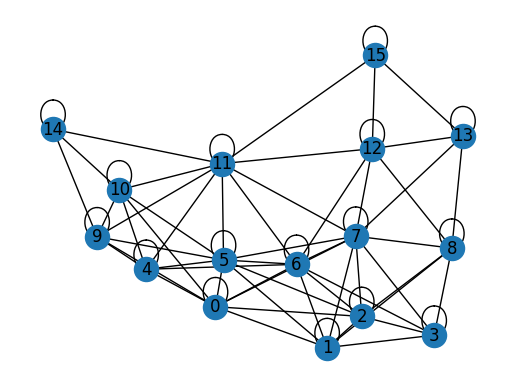

In [ ]:
layout = nx.spring_layout(graph)

# Draw the nodes and edges
nx.draw_networkx_nodes(graph, layout)
nx.draw_networkx_edges(graph, layout)

# Add labels to the nodes if desired
labels = {node: node for node in graph.nodes}
nx.draw_networkx_labels(graph, layout, labels)

# Show the graph
plt.axis("off")
plt.show()

In [ ]:
import os
import mne
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm'  # Specify the path to the folder containing .fif files

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fif'):
        file_path = os.path.join(folder_path, file_name)

        # Read the raw data from the .fif file
        raw_data = mne.io.read_raw_fif(file_path)

        # Get the EEG data
        eeg_data = raw_data.get_data(picks='eeg')

        # Compute the pairwise correlation matrix
        corr_matrix = np.corrcoef(eeg_data)

        # Take the absolute values for positive correlations
        corr_matrix = np.abs(corr_matrix)

        # Threshold the correlation matrix if desired
        threshold = 0.5
        corr_matrix[corr_matrix < threshold] = 0

        # Create a graph using the adjacency matrix
        graph = nx.from_numpy_array(corr_matrix)

        # Layout for graph visualization
        layout = nx.spring_layout(graph)

        # Draw the nodes and edges
        nx.draw_networkx_nodes(graph, layout)
        nx.draw_networkx_edges(graph, layout)

        # Add labels to the nodes if desired
        labels = {node: node for node in graph.nodes}
        nx.draw_networkx_labels(graph, layout, labels)

        # Show the graph
        plt.axis("off")
        plt.title(file_name)  # Set the title as the file name
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
degree_centrality = nx.degree_centrality(graph)
print(degree_centrality)

{0: 0.6666666666666666, 1: 0.6, 2: 0.6, 3: 0.4666666666666667, 4: 0.5333333333333333, 5: 0.7333333333333333, 6: 0.7333333333333333, 7: 0.8, 8: 0.5333333333333333, 9: 0.5333333333333333, 10: 0.5333333333333333, 11: 0.7333333333333333, 12: 0.5333333333333333, 13: 0.4, 14: 0.3333333333333333, 15: 0.3333333333333333}


In [ ]:
import os
import mne
import numpy as np
import networkx as nx

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm'  # Specify the path to the folder containing .fif files

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fif'):
        file_path = os.path.join(folder_path, file_name)

        # Read the raw data from the .fif file
        raw_data = mne.io.read_raw_fif(file_path)

        # Get the EEG data
        eeg_data = raw_data.get_data(picks='eeg')

        # Compute the pairwise correlation matrix
        corr_matrix = np.corrcoef(eeg_data)

        # Take the absolute values for positive correlations
        corr_matrix = np.abs(corr_matrix)

        # Threshold the correlation matrix if desired
        threshold = 0.5
        corr_matrix[corr_matrix < threshold] = 0

        # Create a graph using the adjacency matrix
        graph = nx.from_numpy_array(corr_matrix)

        # Compute the degree centrality for the graph
        degree_centrality = nx.degree_centrality(graph)

        print(f"Degree centrality for {file_name}:")
        print(degree_centrality)
        print()


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S154W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S154W1.fif:
{0: 0.4666666666666667, 1: 0.6, 2: 0.8, 3: 0.6, 4: 0.6, 5: 0.7333333333333333, 6: 0.8, 7: 0.8, 8: 0.4666666666666667, 9: 0.2, 10: 0.7333333333333333, 11: 0.7333333333333333, 12: 0.4666666666666667, 13: 0.6, 14: 0.4, 15: 0.4666666666666667}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S179W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S179W1.fif:
{0: 0.4666666666666667, 1: 0.9333333333333333, 2: 0.8666666666666667, 3: 0.7333333333333333, 4: 0.7333333333333333, 5: 1.0666666666666667, 6: 1.0, 7: 1.0666666666666667, 8: 0.7333333333333333, 9: 0.8, 10: 0.8, 11: 1.0666666666666667, 12: 1.0, 13: 0.7333333333333333, 14: 0.6666666666666666, 15: 0.5333333333333333}

Opening raw d

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S154W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S179W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s158w1.fif) does not conform to MNE na

Degree centrality for s158w1.fif:
{0: 0.8, 1: 0.6666666666666666, 2: 0.8, 3: 0.8666666666666667, 4: 0.8, 5: 0.9333333333333333, 6: 0.9333333333333333, 7: 1.0, 8: 0.8, 9: 0.8, 10: 1.0, 11: 1.0666666666666667, 12: 0.8666666666666667, 13: 0.6, 14: 0.4666666666666667, 15: 0.5333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s157w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for s157w1.fif:
{0: 0.6, 1: 0.7333333333333333, 2: 0.6666666666666666, 3: 0.8666666666666667, 4: 0.8, 5: 1.0666666666666667, 6: 1.1333333333333333, 7: 1.0666666666666667, 8: 0.8666666666666667, 9: 0.8, 10: 1.0666666666666667, 11: 0.9333333333333333, 12: 0.9333333333333333, 13: 0.7333333333333333, 14: 0.7333333333333333, 15: 0.7333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S155W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s157w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S155W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S164W1.fif) does not conform to MNE na

Ready.
Degree centrality for S163W1.fif:
{0: 0.6666666666666666, 1: 0.8666666666666667, 2: 0.6666666666666666, 3: 0.4666666666666667, 4: 0.7333333333333333, 5: 0.9333333333333333, 6: 1.0, 7: 1.0666666666666667, 8: 0.8, 9: 0.7333333333333333, 10: 0.8666666666666667, 11: 1.0, 12: 0.7333333333333333, 13: 0.4666666666666667, 14: 0.6, 15: 0.6666666666666666}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s170w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for s170w1.fif:
{0: 0.6, 1: 0.8666666666666667, 2: 0.8666666666666667, 3: 0.4666666666666667, 4: 0.8, 5: 0.9333333333333333, 6: 0.9333333333333333, 7: 1.0, 8: 0.8666666666666667, 9: 0.8, 10: 1.0666666666666667, 11: 1.0, 12: 1.0666666666666667, 13: 0.8, 14: 0.5333333333333333, 15: 0.6}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S167W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ..

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s170w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S167W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s173w1.fif) does not conform to MNE na


{0: 0.7333333333333333, 1: 0.9333333333333333, 2: 0.8, 3: 0.6666666666666666, 4: 0.9333333333333333, 5: 1.0, 6: 1.0, 7: 1.1333333333333333, 8: 0.8666666666666667, 9: 0.8, 10: 1.0, 11: 1.0, 12: 1.0666666666666667, 13: 0.7333333333333333, 14: 0.8, 15: 0.5333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S165W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S165W1.fif:
{0: 0.6, 1: 0.5333333333333333, 2: 0.5333333333333333, 3: 0.8, 4: 0.6666666666666666, 5: 1.0666666666666667, 6: 1.1333333333333333, 7: 1.1333333333333333, 8: 0.7333333333333333, 9: 0.7333333333333333, 10: 0.8666666666666667, 11: 0.9333333333333333, 12: 0.8666666666666667, 13: 0.7333333333333333, 14: 0.8, 15: 0.8}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S169W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S165W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S169W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S174W1.fif) does not conform to MNE nam

Degree centrality for S177W1.fif:
{0: 0.4666666666666667, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.5333333333333333, 4: 0.7333333333333333, 5: 0.9333333333333333, 6: 1.0, 7: 0.9333333333333333, 8: 0.7333333333333333, 9: 0.7333333333333333, 10: 0.7333333333333333, 11: 0.8666666666666667, 12: 0.8, 13: 0.6, 14: 0.5333333333333333, 15: 0.5333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s178w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for s178w1.fif:
{0: 0.7333333333333333, 1: 0.7333333333333333, 2: 0.8, 3: 0.4, 4: 0.8, 5: 0.8666666666666667, 6: 0.8666666666666667, 7: 0.8666666666666667, 8: 0.4666666666666667, 9: 0.6, 10: 0.8666666666666667, 11: 0.9333333333333333, 12: 0.8666666666666667, 13: 0.3333333333333333, 14: 0.6, 15: 0.4666666666666667}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s176w1.fif...
Isotrak not found


<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s178w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s176w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s20w1.fif) does not conform to MNE nam

Ready.
Degree centrality for s12w1.fif:
{0: 0.3333333333333333, 1: 0.6, 2: 0.4666666666666667, 3: 0.3333333333333333, 4: 0.4666666666666667, 5: 0.7333333333333333, 6: 0.6, 7: 0.7333333333333333, 8: 0.4666666666666667, 9: 0.4, 10: 0.6666666666666666, 11: 0.6666666666666666, 12: 0.6666666666666666, 13: 0.4666666666666667, 14: 0.4, 15: 0.4}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S10W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S10W1.fif:
{0: 0.5333333333333333, 1: 0.6, 2: 0.6, 3: 0.6, 4: 0.5333333333333333, 5: 0.7333333333333333, 6: 0.7333333333333333, 7: 0.6, 8: 0.5333333333333333, 9: 0.4, 10: 0.4666666666666667, 11: 0.5333333333333333, 12: 0.4, 13: 0.4, 14: 0.4, 15: 0.3333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S196W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree ce

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S10W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S196W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S18W1.fif) does not conform to MNE nami

Degree centrality for S182W1.fif:
{0: 0.5333333333333333, 1: 0.4666666666666667, 2: 0.6, 3: 0.6, 4: 0.5333333333333333, 5: 0.8, 6: 0.9333333333333333, 7: 0.8, 8: 0.6666666666666666, 9: 0.4666666666666667, 10: 0.8, 11: 0.7333333333333333, 12: 0.8, 13: 0.6, 14: 0.5333333333333333, 15: 0.6666666666666666}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S26W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S26W1.fif:
{0: 0.6, 1: 0.7333333333333333, 2: 0.7333333333333333, 3: 0.6, 4: 0.6666666666666666, 5: 0.8, 6: 0.6666666666666666, 7: 0.8666666666666667, 8: 0.6, 9: 0.5333333333333333, 10: 0.6666666666666666, 11: 0.6, 12: 0.6666666666666666, 13: 0.5333333333333333, 14: 0.4666666666666667, 15: 0.5333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S31W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
De

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S26W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S31W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s27w1.fif) does not conform to MNE naming

Degree centrality for s27w1.fif:
{0: 0.4666666666666667, 1: 0.6, 2: 0.6, 3: 0.3333333333333333, 4: 0.5333333333333333, 5: 0.8, 6: 0.7333333333333333, 7: 0.7333333333333333, 8: 0.5333333333333333, 9: 0.4666666666666667, 10: 0.6666666666666666, 11: 0.5333333333333333, 12: 0.6666666666666666, 13: 0.4, 14: 0.26666666666666666, 15: 0.3333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s43w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for s43w1.fif:
{0: 0.26666666666666666, 1: 0.4, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 0.4, 5: 0.6666666666666666, 6: 0.5333333333333333, 7: 0.6666666666666666, 8: 0.3333333333333333, 9: 0.26666666666666666, 10: 0.6, 11: 0.6, 12: 0.6666666666666666, 13: 0.4666666666666667, 14: 0.4, 15: 0.5333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S42W1.fif...
Isotrak not found
    Range : 0 ..

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s43w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S42W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S47W1.fif) does not conform to MNE namin

Degree centrality for S47W1.fif:
{0: 0.6, 1: 0.5333333333333333, 2: 0.6, 3: 0.3333333333333333, 4: 0.6, 5: 0.7333333333333333, 6: 0.7333333333333333, 7: 0.8666666666666667, 8: 0.4666666666666667, 9: 0.26666666666666666, 10: 0.7333333333333333, 11: 0.4666666666666667, 12: 0.5333333333333333, 13: 0.2, 14: 0.26666666666666666, 15: 0.2}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S50W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S50W.fif:
{0: 0.7333333333333333, 1: 0.8, 2: 0.8, 3: 0.7333333333333333, 4: 0.5333333333333333, 5: 0.8666666666666667, 6: 0.9333333333333333, 7: 0.8666666666666667, 8: 0.6666666666666666, 9: 0.5333333333333333, 10: 0.6666666666666666, 11: 0.5333333333333333, 12: 0.6666666666666666, 13: 0.6, 14: 0.2, 15: 0.26666666666666666}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s53w1.fif...
Isotrak not found
    Range : 0 ... 

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S50W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s53w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S55W1.fif) does not conform to MNE naming

Degree centrality for S59LW.fif:
{0: 0.4666666666666667, 1: 0.6, 2: 0.5333333333333333, 3: 0.4, 4: 0.4666666666666667, 5: 0.7333333333333333, 6: 0.6666666666666666, 7: 0.5333333333333333, 8: 0.4, 9: 0.4666666666666667, 10: 0.5333333333333333, 11: 0.5333333333333333, 12: 0.4666666666666667, 13: 0.3333333333333333, 14: 0.4, 15: 0.3333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S60W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S60W.fif:
{0: 0.13333333333333333, 1: 0.6, 2: 0.5333333333333333, 3: 0.6, 4: 0.3333333333333333, 5: 0.6666666666666666, 6: 0.7333333333333333, 7: 0.8, 8: 0.6, 9: 0.3333333333333333, 10: 0.6666666666666666, 11: 0.6, 12: 0.8, 13: 0.4666666666666667, 14: 0.4666666666666667, 15: 0.4666666666666667}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S72W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S60W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S72W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S78W.fif) does not conform to MNE naming 

Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S78W.fif:
{0: 0.6666666666666666, 1: 0.6666666666666666, 2: 0.8, 3: 0.8, 4: 0.7333333333333333, 5: 0.8666666666666667, 6: 0.8666666666666667, 7: 0.8666666666666667, 8: 0.5333333333333333, 9: 0.4666666666666667, 10: 0.6666666666666666, 11: 0.6, 12: 0.8, 13: 0.3333333333333333, 14: 0.2, 15: 0.26666666666666666}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S85W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S85W1.fif:
{0: 0.4666666666666667, 1: 0.7333333333333333, 2: 0.8, 3: 0.7333333333333333, 4: 0.7333333333333333, 5: 0.9333333333333333, 6: 0.8666666666666667, 7: 0.8666666666666667, 8: 0.7333333333333333, 9: 0.4, 10: 0.6666666666666666, 11: 0.9333333333333333, 12: 0.8, 13: 0.5333333333333333, 14: 0.26666666666666666, 15: 0.3333333333333333}

Opening raw data file /content/drive/MyDr

<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S85W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s94w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s152w1.fif) does not conform to MNE nami

Degree centrality for s152w1.fif:
{0: 0.6666666666666666, 1: 0.6666666666666666, 2: 1.0, 3: 0.4666666666666667, 4: 0.7333333333333333, 5: 0.8666666666666667, 6: 1.0, 7: 1.0, 8: 0.7333333333333333, 9: 0.7333333333333333, 10: 0.8, 11: 0.9333333333333333, 12: 0.8, 13: 0.6, 14: 0.4, 15: 0.3333333333333333}

Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S153W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Degree centrality for S153W1.fif:
{0: 0.6666666666666666, 1: 0.6, 2: 0.6, 3: 0.4666666666666667, 4: 0.5333333333333333, 5: 0.7333333333333333, 6: 0.7333333333333333, 7: 0.8, 8: 0.5333333333333333, 9: 0.5333333333333333, 10: 0.5333333333333333, 11: 0.7333333333333333, 12: 0.5333333333333333, 13: 0.4, 14: 0.3333333333333333, 15: 0.3333333333333333}



<ipython-input-74-b4f0853a8910>:14: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S153W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


In [ ]:
import os
import mne
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm'  # Specify the path to the folder containing .fif files

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fif'):
        file_path = os.path.join(folder_path, file_name)

        # Read the raw data from the .fif file
        raw_data = mne.io.read_raw_fif(file_path)

        # Get the EEG data
        eeg_data = raw_data.get_data(picks='eeg')

        # Compute the pairwise correlation matrix
        corr_matrix = np.corrcoef(eeg_data)

        # Take the absolute values for positive correlations
        corr_matrix = np.abs(corr_matrix)

        # Threshold the correlation matrix if desired
        threshold = 0.5
        corr_matrix[corr_matrix < threshold] = 0

        # Create a graph using the adjacency matrix
        graph = nx.from_numpy_array(corr_matrix)

        # Compute the degree centrality for the graph
        degree_centrality = nx.degree_centrality(graph)

        # Create a dictionary for node colors based on centrality values
        node_colors = {node: centrality_value for node, centrality_value in degree_centrality.items()}

        # Plot the graph with nodes colored based on centrality values
        pos = nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, node_color=list(node_colors.values()), cmap='coolwarm')
        plt.title(file_name)  # Set the title as the file name
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import mne
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm'  # Specify the path to the folder containing .fif files

# Create a directory to store the graph images
output_dir = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G_saved/norm'  # Specify the path to the output directory
os.makedirs(output_dir, exist_ok=True)

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fif'):
        file_path = os.path.join(folder_path, file_name)

        # Read the raw data from the .fif file
        raw_data = mne.io.read_raw_fif(file_path)

        # Get the EEG data
        eeg_data = raw_data.get_data(picks='eeg')

        # Compute the pairwise correlation matrix
        corr_matrix = np.corrcoef(eeg_data)

        # Take the absolute values for positive correlations
        corr_matrix = np.abs(corr_matrix)

        # Threshold the correlation matrix if desired
        threshold = 0.5
        corr_matrix[corr_matrix < threshold] = 0

        # Create a graph using the adjacency matrix
        graph = nx.from_numpy_array(corr_matrix)

        # Compute the degree centrality for the graph
        degree_centrality = nx.degree_centrality(graph)

        # Create a dictionary for node colors based on centrality values
        node_colors = {node: centrality_value for node, centrality_value in degree_centrality.items()}

        # Plot the graph with nodes colored based on centrality values
        pos = nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, node_color=list(node_colors.values()), cmap='coolwarm')
        plt.title(file_name)  # Set the title as the file name

        # Save the graph image with a class-specific name
       # class_name = "your_class_name"  # Replace "your_class_name" with the actual class name
        output_file_path = os.path.join(output_dir, f"{file_name[:-4]}.png")
        plt.savefig(output_file_path)
        plt.close()


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S154W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S154W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S179W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S179W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s158w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s158w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s157w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s157w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S155W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S155W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S164W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S164W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S163W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S163W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s170w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s170w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S167W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S167W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s173w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s173w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S165W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S165W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S169W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S169W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S174W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S174W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S177W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S177W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s178w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s178w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s176w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s176w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s20w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s20w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s12w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s12w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S10W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S10W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S196W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S196W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S18W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S18W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S182W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S182W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S26W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S26W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S31W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S31W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s27w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s27w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s43w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s43w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S42W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S42W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S47W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S47W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S50W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S50W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s53w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s53w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S55W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S55W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S59LW.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S59LW.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S60W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S60W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S72W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S72W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S78W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S78W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S85W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S85W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s94w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s94w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s152w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/s152w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S153W1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-78-f01bd130d128>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/norm/S153W1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


In [ ]:
import os
import mne
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch'  # Specify the path to the folder containing .fif files

# Create a directory to store the graph images
output_dir = '/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G_saved/sch'  # Specify the path to the output directory
os.makedirs(output_dir, exist_ok=True)

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fif'):
        file_path = os.path.join(folder_path, file_name)

        # Read the raw data from the .fif file
        raw_data = mne.io.read_raw_fif(file_path)

        # Get the EEG data
        eeg_data = raw_data.get_data(picks='eeg')

        # Compute the pairwise correlation matrix
        corr_matrix = np.corrcoef(eeg_data)

        # Take the absolute values for positive correlations
        corr_matrix = np.abs(corr_matrix)

        # Threshold the correlation matrix if desired
        threshold = 0.5
        corr_matrix[corr_matrix < threshold] = 0

        # Create a graph using the adjacency matrix
        graph = nx.from_numpy_array(corr_matrix)

        # Compute the degree centrality for the graph
        degree_centrality = nx.degree_centrality(graph)

        # Create a dictionary for node colors based on centrality values
        node_colors = {node: centrality_value for node, centrality_value in degree_centrality.items()}

        # Plot the graph with nodes colored based on centrality values
        pos = nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, node_color=list(node_colors.values()), cmap='coolwarm')
        plt.title(file_name)  # Set the title as the file name

        # Save the graph image with a class-specific name
      #  class_name = "your_class_name"  # Replace "your_class_name" with the actual class name
        output_file_path = os.path.join(output_dir, f"{file_name[:-4]}.png")
        plt.savefig(output_file_path)
        plt.close()


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/088w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/088w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/022w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/022w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/113w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/113w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/103w.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/103w.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/155w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/155w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/156w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/156w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/192w.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/192w.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/219w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/219w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/221w.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/221w.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/276w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/276w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/249w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/249w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/33w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/33w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/32w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/32w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/s425w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/s425w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/510-1W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/510-1W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/S084-1W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/S084-1W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/s351w.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/s351w.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/307w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/307w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/312w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/312w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/517w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/517w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/548w.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/548w.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/575w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/575w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/515w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/515w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/540w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/540w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/573w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/573w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/585w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/585w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/586w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/586w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/642w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/642w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/683w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/683w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/719w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/719w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/342mw1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/342mw1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/r229w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/r229w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/r416w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/r416w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/s083w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/s083w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/314w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/314w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/382w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/382w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/387-02w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/387-02w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/387-03w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/387-03w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/401w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/401w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/423w.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/423w.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/429w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/429w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/454-1W.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/454-1W.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/508w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/508w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/485w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/485w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)


Opening raw data file /content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/509w1.fif...
Isotrak not found
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


<ipython-input-79-1bf9193ff184>:19: RuntimeWarning: This filename (/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL/out/G/sch/509w1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path)
